## Max Wagner
## Week 8 - Data 620

### 1. The project will be using the 'carroll-alice.txt' file

In [1]:
from nltk.corpus import gutenberg as gb
from nltk.corpus import stopwords as sw
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
gb.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

### 2. Load in the corpus, strip stop words, numbers, punctuation, and anything else that seems unwise to keep.

In [2]:
carroll = gb.words('carroll-alice.txt')

In [3]:
# rem stopwords
sw_cache = sw.words("english") # cache for better speed
carroll_fix = [word for word in carroll if word not in sw_cache]

In [4]:
# check lens of both to make sure it worked
len(carroll)

34110

In [5]:
len(carroll_fix)

20722

In [6]:
# seems ok, now remove numbers/punctuation
carroll_fix2 = [word for word in carroll_fix if word.isalpha()]

In [7]:
# check lens of the new fix
len(carroll_fix2)

13945

In [8]:
# finally make it all lowercase
carroll_fin = [word.lower() for word in carroll_fix2]

In [9]:
# and now find the uniques!
len(set(carroll_fin))

2524

### 3. How many words make up half the total words?

In [10]:
# need to aim for half the length
half_length = len(carroll_fin)/2
half_length

6972

In [11]:
# do some of the work for part 4 here as well
carroll_f = nltk.FreqDist(carroll_fin)
carroll_common = carroll_f.most_common()

In [12]:
# find how many common words it takes to get to the halfway point
i = 0
half_words = 0
for word in carroll_common:
    if i >= half_length:
        break
    else:
        i = i + word[1]
        half_words = half_words + 1
        
half_words

163

In [13]:
carroll_frame = pd.DataFrame(carroll_common, columns = ['Word', 'Count'])
carroll_frame['Cum_Sum'] = carroll_frame.Count.cumsum()
carroll_frame['Cum_Percent'] = 100 * carroll_frame.Cum_Sum / carroll_frame.Count.sum()
carroll_frame.iloc[161:164]

,Word,Count,Cum_Sum,Cum_Percent
161,bit,16,6968,49.967730
162,high,16,6984,50.082467
163,near,15,6999,50.190032


### 4. Identify the 200 most common words:

In [14]:
carroll_frame.iloc[0:200]

,Word,Count,Cum_Sum,Cum_Percent
0,i,543,543,3.893869
1,said,462,1005,7.206884
2,alice,398,1403,10.060954
3,little,128,1531,10.978845
4,the,115,1646,11.803514
5,one,104,1750,12.549301
6,know,88,1838,13.180351
7,like,85,1923,13.789889
8,would,83,2006,14.385084
9,went,83,2089,14.980280


### 5. Graph the top 200 words:

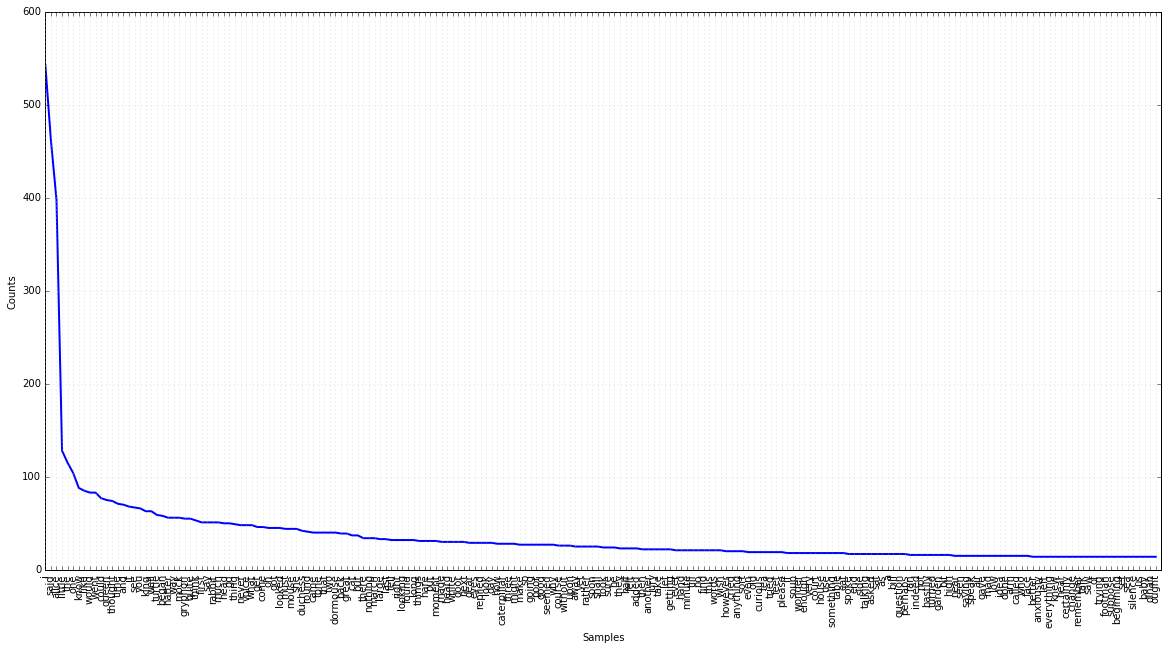

In [15]:
plt.figure(figsize = (20,10))
carroll_f.plot(200)

### 6. Zipf's Law?

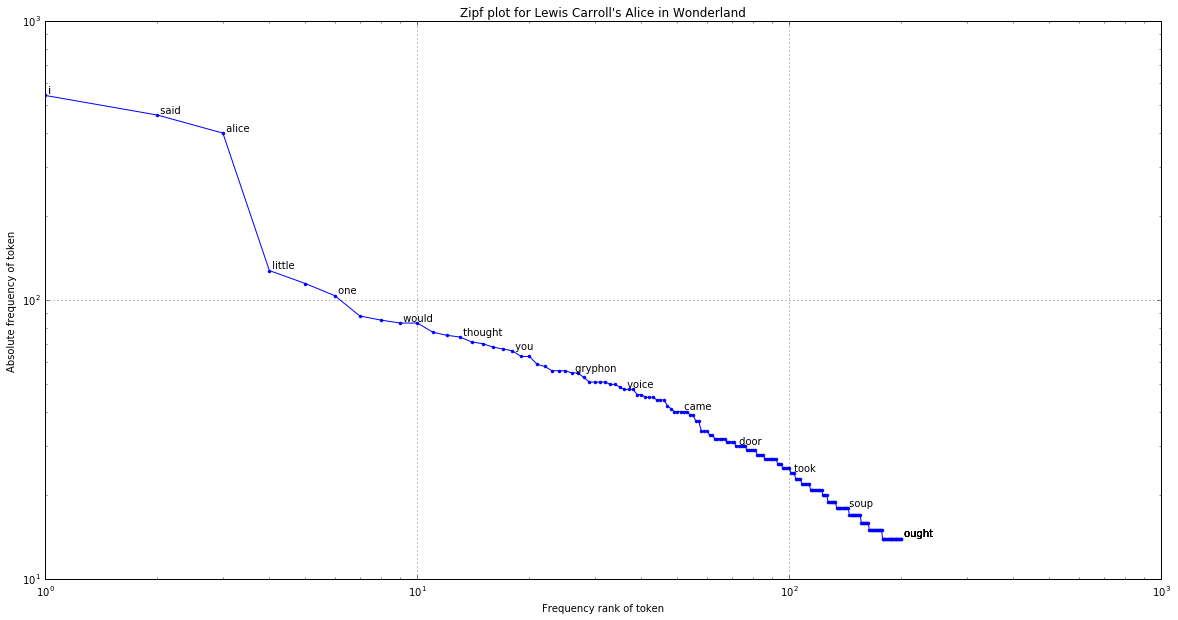

In [16]:
# This section was odd to figure out, ended up using a link from Brown
# as my method was not looking like it should.
# https://finnaarupnielsen.wordpress.com/2013/10/22/zipf-plot-for-word-counts-in-brown-corpus/
from string import lower
from collections import Counter
from __future__ import division
from itertools import *
from pylab import *

plt.figure(figsize = (20,10))
carroll_common = carroll_f.most_common(200)
counts = array([word[1] for word in carroll_common])
tokens = array([word[0] for word in carroll_common])
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
loglog(ranks, frequencies, marker=".")
title("Zipf plot for Lewis Carroll's Alice in Wonderland")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)), 20).astype(int)-1):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

show()

Zipf's law says that "the frequency of any word is inversely proportional to its rank in the frequency table." Given this idea, the expected graph above would show a relatively straight line. However, the first three words for a line of their own, with the other 197 forming a fairly straight line. This is not ideal, but the explanation could come from the corpus being formed of an unusual amount of dialogue. The top three words, "I", "alice", and "said" would be expected to be said in most cases of dialogue. 

Overall, I would say this corpus follows Zipf's law.

### 7. How does this corpus differ from corpora as a collective?

I covered this slightly in the explanation of Zipf's law, but the idea again is that due to excessive dialogue this corpus has a slightly different frequency structure than would be expected. Additionally, the specific words in the corpus can change depending on which are used. It would be interesting to combine different sources and compare the results.